## Install Fuzzy package

In [ ]:
# pip install scikit-fuzzy

## Construct Fuzzy Set and set universe 

In [75]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import skfuzzy.control as fuzz_ctrl
from mpl_toolkits.mplot3d import Axes3D

# Range

## range of temp. & soil & watering
# 32 F -> 0 C, 123 F -> 50.5555556 C
x_temp_range = np.arange(32,123,1,np.float32)
x_soil_range = np.arange(0,101,1,np.float32)
y_time_range = np.arange(0,31,1,np.float32)
##　variable and membership functions
x_temp = fuzz_ctrl.Antecedent(x_temp_range,"temp")
x_soil= fuzz_ctrl.Antecedent(x_soil_range,"soil")
y_time = fuzz_ctrl.Consequent(y_time_range,"time")

## Membership functions

In [76]:
# Original Setup
# temp_cold = fuzz.trapmf(x_temp_range,[32,32,50,68])
# temp_cool = fuzz.trimf(x_temp_range,[50,68,86])
# temp_normal = fuzz.trimf(x_temp_range,[59,77,95])
# temp_warm = fuzz.trimf(x_temp_range,[68,86,104])
# temp_hot = fuzz.trapmf(x_temp_range,[86,104,122,122])

# soil_dry = fuzz.trapmf(x_soil_range,[0,0,16.5,49.5])
# soil_moist = fuzz.trapmf(x_soil_range,[16.5,40.5,62.5,88.6])
# soil_wet = fuzz.trapmf(x_soil_range,[65.5,88.6,100,100])

# time_short = fuzz.trapmf(y_time_range,[0,0,2,8])
# time_medium = fuzz.trapmf(y_time_range,[2,10,15,23])
# time_long = fuzz.trapmf(y_time_range,[16,23,30,30])

# Revised Setup
temp_cold = fuzz.trapmf(x_temp_range,[32,32,50,68])

temp_cool = fuzz.gaussmf(x_temp_range, 68, 5)


temp_normal = fuzz.gaussmf(x_temp_range, 77, 5)
temp_warm = fuzz.gaussmf(x_temp_range,86, 5)
temp_hot = fuzz.trapmf(x_temp_range,[86,104,122,122])

soil_dry = fuzz.trapmf(x_soil_range,[0,0,17,35])
soil_moist = fuzz.trapmf(x_soil_range,[17,35,65,85])
soil_wet = fuzz.trapmf(x_soil_range,[65,85,100,100])

time_short = fuzz.trapmf(y_time_range,[0,0,2,8])
time_medium = fuzz.trapmf(y_time_range,[2,8,15,23])
time_long = fuzz.trapmf(y_time_range,[15,23,30,30])


x_temp["cold"] = temp_cold
x_temp["cool"] = temp_cool
x_temp["normal"] = temp_normal
x_temp["warm"] = temp_warm
x_temp["hot"] = temp_hot

x_soil["dry"] = soil_dry
x_soil["moist"] = soil_moist
x_soil["wet"] = soil_wet

y_time["short"] = time_short
y_time["medium"] = time_medium
y_time["long"] = time_long



## Visualization

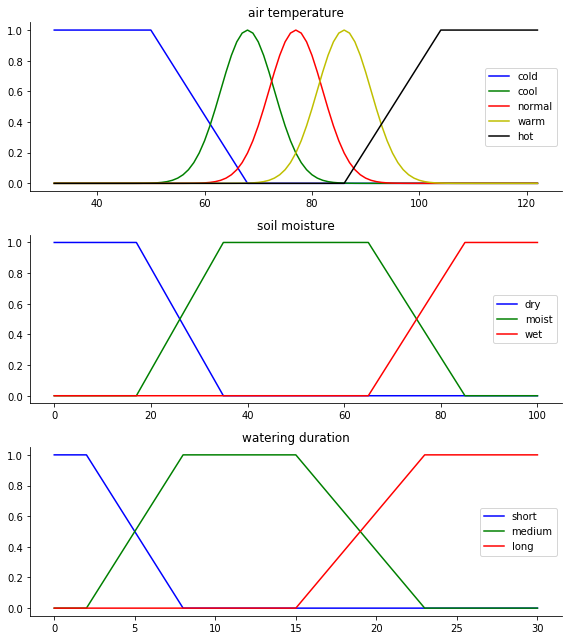

In [77]:
# Visualize these universes and membership functions
fig,(figure1,figure2,figure3)=plt.subplots(nrows=3,figsize=(8,9))

figure1.plot(x_temp_range, temp_cold ,'b',linewidth=1.5,label='cold')
figure1.plot(x_temp_range, temp_cool,'g',linewidth=1.5,label='cool')
figure1.plot(x_temp_range, temp_normal,'r',linewidth=1.5,label='normal')
figure1.plot(x_temp_range, temp_warm,'y',linewidth=1.5,label='warm')
figure1.plot(x_temp_range, temp_hot,'k',linewidth=1.5,label='hot')
figure1.set_title('air temperature')
figure1.legend()

figure2.plot(x_soil_range, soil_dry,'b',linewidth=1.5,label='dry')
figure2.plot(x_soil_range, soil_moist,'g',linewidth=1.5,label='moist')
figure2.plot(x_soil_range, soil_wet,'r',linewidth=1.5,label='wet')
figure2.set_title('soil moisture')
figure2.legend()

figure3.plot(y_time_range, time_short,'b',linewidth=1.5,label='short')
figure3.plot(y_time_range, time_medium,'g',linewidth=1.5,label='medium')
figure3.plot(y_time_range, time_long,'r',linewidth=1.5,label='long')
figure3.set_title('watering duration')
figure3.legend()

# plot 2d figures
for fi in (figure1,figure2,figure3):
  fi.spines['top'].set_visible(False)
  fi.spines['right'].set_visible(False)
  fi.get_xaxis().tick_bottom()
  fi.get_yaxis().tick_left()

plt.tight_layout()



## Rules

In [78]:
# Original Setup

# Centroid Defuzzification
# y_time.defuzzify_method = "centroid"
# Rules 
# rule_long=fuzz_ctrl.Rule(antecedent=((x_temp["hot"]&x_soil["dry"])|(x_temp["warm"]&x_soil["dry"])),consequent=y_time["long"],label="long")
# rule_med=fuzz_ctrl.Rule(antecedent=((x_temp["normal"]&x_soil["dry"])|(x_temp["cool"]&x_soil["dry"])|(x_temp["hot"]&x_soil["moist"])|(x_temp["warm"]&x_soil["moist"])|(x_temp["normal"]&x_soil["moist"])),consequent = y_time["medium"],label="medium")
# rule_short=fuzz_ctrl.Rule(antecedent=((x_temp["cool"]&x_soil["moist"])|(x_temp["cold"]&x_soil["moist"])|(x_temp["hot"]&x_soil["wet"])|(x_temp["warm"]&x_soil["wet"])|(x_temp["normal"]&x_soil["wet"])|(x_temp["cool"]&x_soil["wet"])|(x_temp["cold"]&x_soil["wet"])|(x_temp['cold']&x_soil['dry'])),consequent=y_time["short"],label="short")

# Revised Setup

# Centroid Defuzzification
y_time.defuzzify_method = "centroid"
# Rules 
rule_long=fuzz_ctrl.Rule(antecedent=((x_temp["normal"]&x_soil["dry"])|(x_temp["hot"]&x_soil["dry"])|(x_temp["warm"]&x_soil["dry"]))|(x_temp["hot"]&x_soil["moist"]),consequent=y_time["long"],label="long")
rule_med=fuzz_ctrl.Rule(antecedent=((x_temp["cool"]&x_soil["dry"])|(x_temp["warm"]&x_soil["moist"])|(x_temp["normal"]&x_soil["moist"])),consequent = y_time["medium"],label="medium")
rule_short=fuzz_ctrl.Rule(antecedent=((x_temp["cool"]&x_soil["moist"])|(x_temp["cold"]&x_soil["moist"])|(x_temp["hot"]&x_soil["wet"])|(x_temp["warm"]&x_soil["wet"])|(x_temp["normal"]&x_soil["wet"])|(x_temp["cool"]&x_soil["wet"])|(x_temp["cold"]&x_soil["wet"])|(x_temp['cold']&x_soil['dry'])),consequent=y_time["short"],label="short")


system=fuzz_ctrl.ControlSystem(rules=[rule_long,rule_med,rule_short])
sys_sim=fuzz_ctrl.ControlSystemSimulation(system)

## User Input

In [91]:
input_temp=input("Input Temp(℉): ")
input_soil=input("Input Moisture(%): ")

sys_sim.input["temp"]=int(input_temp)
sys_sim.input["soil"]=int(input_soil)

# System Compute
sys_sim.compute()
out_y=sys_sim.output["time"]
print(out_y)

15.906406488444674


# 3D figure


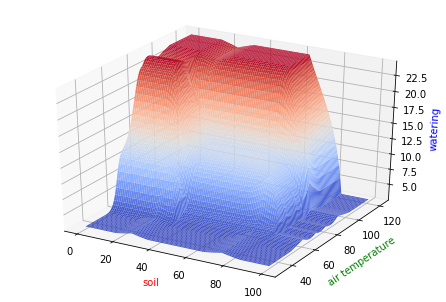

In [72]:
from mpl_toolkits.mplot3d import Axes3D
def funz(x,y):
  sys_sim.input["temp"] = y
  sys_sim.input["soil"] = x 
  sys_sim.compute()
  z=sys_sim.output["time"]
  return z

fig1=plt.figure()
ax=Axes3D(fig1)

X,Y=np.meshgrid(x_soil_range,x_temp_range)
Z=funz(X,Y)
ax.plot_surface(X, Y, Z, rstride=1,cstride=1,cmap=plt.cm.coolwarm)
ax.set_xlabel('soil',color='r')
ax.set_ylabel('air temperature',color='g')
ax.set_zlabel('watering',color='b')
plt.show()